#plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/skaZPhb.png" width="350px"/></td>
<td><img src="https://i.imgur.com/gaNttYd.png" width="350px"/></td>
<td><img src="https://i.imgur.com/pampioh.png"/></td>
<td><img src="https://i.imgur.com/OSbuszd.png"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Bar Chat</td>
<td style="font-weight:bold; font-size:16px;">Line Chart</td>
<td style="font-weight:bold; font-size:16px;">Area Chart</td>
<td style="font-weight:bold; font-size:16px;">Histogram</td>
</tr>
<tr>
<td>df.plot.bar()</td>
<td>df.plot.line()</td>
<td>df.plot.area()</td>
<td>df.plot.hist()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>	Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</table>

----

The `pandas` library is the core library for Python data analysis: the "killer feature" that makes the entire ecosystem stick together. However, it can do more than load and transform your data: it can visualize it too! Indeed, the easy-to-use and expressive pandas plotting API is a big part of `pandas` popularity.

In this section we will learn the basic `pandas` plotting facilities, starting with the simplest type of visualization: single-variable or "univariate" visualizations. This includes basic tools like bar plots and line charts. Through these we'll get an understanding of `pandas` plotting library structure, and spend some time examining data types.

# plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hexbin()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</table>

----


In the previous notebook, we explored using `pandas` to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.

Data without relationships between variables is the data science equivalent of a blank canvas. To paint the picture in, we need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

The selected code reviews = pd.read_csv("/content/winemag-data_first150k.csv", index_col=0) reads a CSV file named "winemag-data_first150k.csv" into a pandas DataFrame called reviews. The index_col=0 argument specifies that the first column of the CSV should be used as the index of the DataFrame.

In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/winemag-data_first150k.csv", index_col=0)
reviews.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Bar charts and categorical data

Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

In [ ]:
reviews['province'].value_counts().head(10)

,count
province,
California,44508
Washington,9750
Tuscany,7281
Bordeaux,6111
Northern Spain,4892
Mendoza Province,4742
Oregon,4589
Burgundy,4308
Piedmont,4093


<Axes: xlabel='province'>

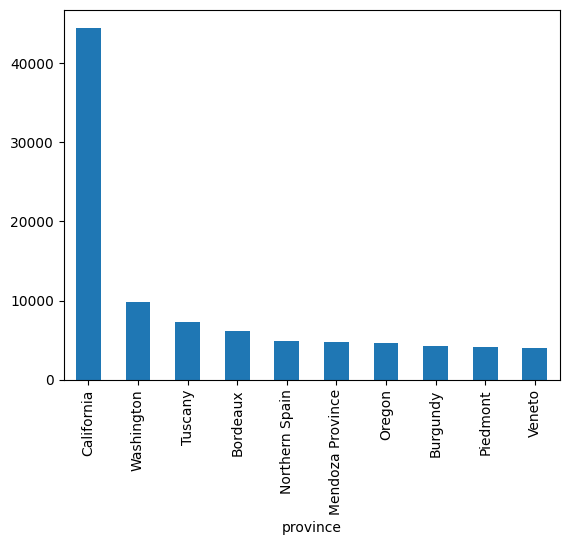

In [ ]:
reviews['province'].value_counts().head(10).plot.bar()

#This code generates a bar plot showing the top 10 most frequent values in the 'province' column of the reviews DataFrame.

#reviews['province']: Selects the 'province' column from the reviews DataFrame.
#value_counts(): Counts the occurrences of each unique value in the 'province' column.
#head(10): Selects the top 10 most frequent provinces.
#plot.bar(): Generates a bar plot from the resulting data, where each bar represents a province and its height corresponds to the count of reviews from that province.

What does this plot tell us? It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions. No problem:

<Axes: xlabel='province'>

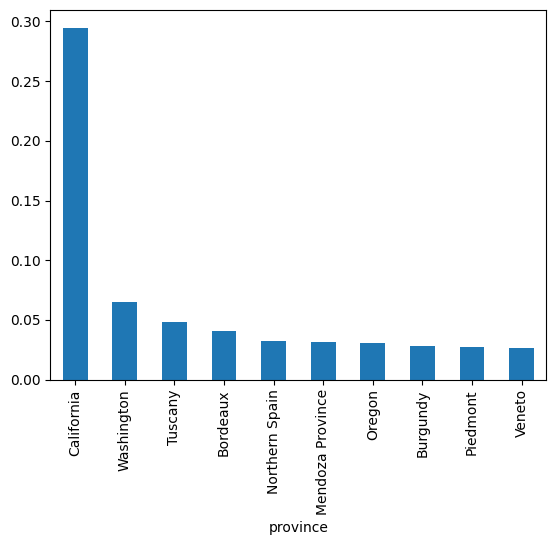

In [ ]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

The selected code reviews['points'].value_counts().sort_index().plot.bar() generates a bar plot showing the distribution of wine scores.

reviews['points']: Selects the 'points' column from the reviews DataFrame.
value_counts(): Counts the occurrences of each unique value in the 'points' column.
sort_index(): Sorts the resulting counts by the unique point values (the index).
plot.bar(): Generates a bar plot from the sorted data, where each bar represents a point value and its height corresponds to the number of wines with that score.

<AxesSubplot:>

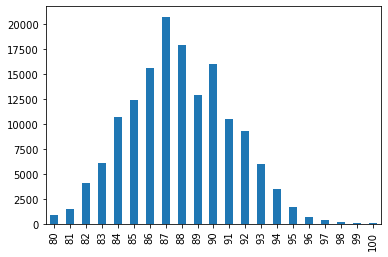

In [ ]:
reviews['points'].value_counts().sort_index().plot.bar()

As you can see, every vintage is allotted an overall score between 80 and 100; and, if we are to believe that Wine Magazine is an arbiter of good taste, then a 92 is somehow meaningfully "better" than a 91.

## Line charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart:

<AxesSubplot:>

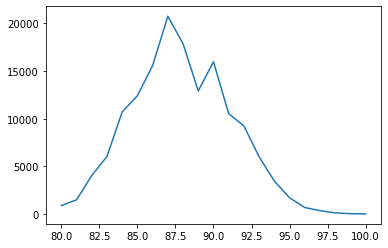

In [ ]:
reviews['points'].value_counts().sort_index().plot.line()

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Histograms

Here's a histogram:

The selected code reviews[reviews['price'] < 200]['price'].plot.hist() generates a histogram of wine prices, but only for wines priced under $200.

reviews['price'] < 200: This creates a boolean mask, which is a series of True/False values indicating whether the price for each wine is less than 200.
reviews[...]: This uses the boolean mask to select only the rows from the reviews DataFrame where the price is less than 200.
['price']: From the filtered DataFrame, this selects the 'price' column.
.plot.hist(): This generates a histogram of the selected price data. The histogram shows the frequency distribution of wine prices within different bins (ranges) up to $200.

<Axes: ylabel='Frequency'>

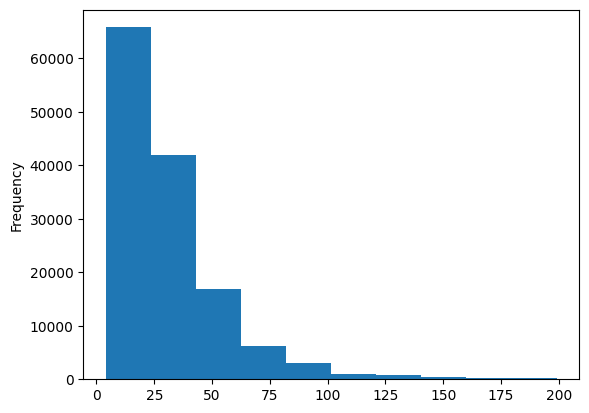

In [ ]:
reviews[reviews['price'] < 200]['price'].plot.hist()

A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

However, histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up into even intervals, they don't deal very well with skewed data:

# Scatter Plot

<Axes: xlabel='price', ylabel='points'>

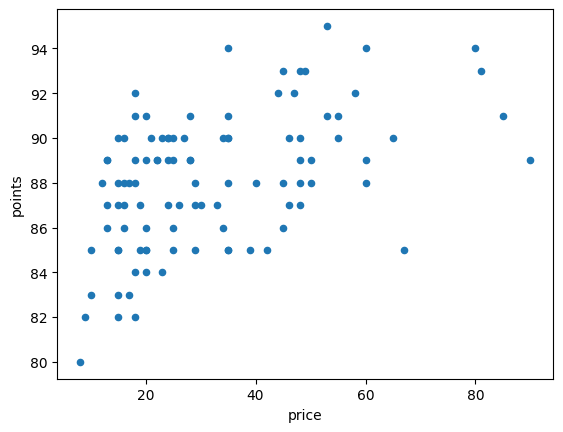

In [ ]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

#Hex Plot

<Axes: xlabel='price', ylabel='points'>

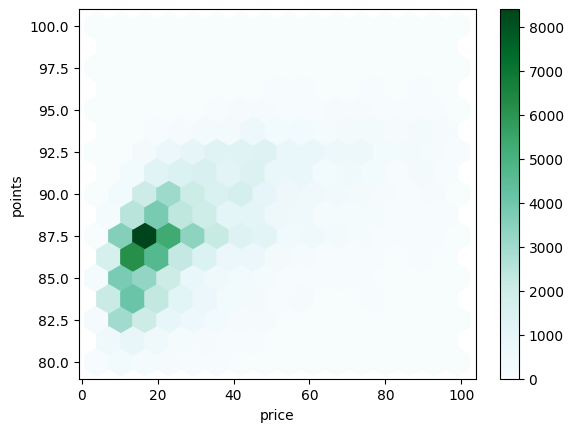

In [ ]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)